In [121]:
%matplotlib inline
import geopandas as gpd
# fp = 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
fp = 'statistical-gis-boundaries-london/ESRI/London_Ward_CityMerged.shp'
# fp = 'statistical-gis-boundaries-london/ESRI/London_Ward.shp'
map_df = gpd.read_file(fp)
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.6 165447.1, 517837.1 165469.4..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.5 167303.4, 518114.3 167307.5..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480 166909.8, 520490.7 166901.9, ..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071 168144.9, 522063.9 168144, 52..."


In [135]:
map_df[map_df['NAME']=='Abbey']

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
415,Abbey,E05000455,139.326,0.000,E09000024,Merton,50779,"POLYGON ((525122.6 170480.9, 525185.4 170464.5..."
611,Abbey,E05000026,128.292,2.655,E09000002,Barking and Dagenham,51353,"POLYGON ((543595.5 184832.8, 543601.7 184831.2..."


In [ ]:
map_ward=map_df[['NAME', 'GSS_CODE', 'LB_GSS_CD', 'BOROUGH']]


In [123]:
df_ward=pd.read_csv('ward-profiles-excel-version.csv', header=0, encoding = "ISO-8859-1")
cols=pd.DataFrame(df_ward.columns)
cols.to_csv('ward-profiles-columns.csv')
print(cols[0].to_string())

0                                             Ward name
1                                              Old code
2                                              New code
3                                     Population - 2015
4                             Children aged 0-15 - 2015
5                            Working-age (16-64) - 2015
6                          Older people aged 65+ - 2015
7                       % All Children aged 0-15 - 2015
8                      % All Working-age (16-64) - 2015
9                    % All Older people aged 65+ - 2015
10                                      Mean Age - 2013
11                                    Median Age - 2013
12                             Area - Square Kilometres
13        Population density (persons per sq km) - 2013
14                                        % BAME - 2011
15                              % Not Born in UK - 2011
16    % English is First Language of no one in house...
17                        General Fertility Rate

In [122]:
df1=df_ward[['New code', 'Ward name', 
             'Population density (persons per sq km) - 2013',
             '% All Children aged 0-15 - 2015',
             '% All Working-age (16-64) - 2015',
             '% All Older people aged 65+ - 2015']]
df1.columns=['GSS_CODE', 'WARD_NAME', 'POPULATION_DENSITY', '0-15', '16-64', '65+']
df1.head()

,GSS_CODE,WARD_NAME,POPULATION_DENSITY,0-15,16-64,65+
0,E09000001,City of London,2538.1,8.0,76.9,15.2
1,E05000026,Barking and Dagenham - Abbey,10500.0,26.0,69.0,5.0
2,E05000027,Barking and Dagenham - Alibon,7428.6,25.7,64.3,10.0
3,E05000028,Barking and Dagenham - Becontree,9269.2,25.4,65.9,8.7
4,E05000029,Barking and Dagenham - Chadwell Heath,2985.3,24.3,61.5,14.2


In [106]:
merged = map_df.set_index('GSS_CODE').join(df1.set_index('GSS_CODE'))
merged.head()

,NAME,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,WARD_NAME,POPULATION_DENSITY,0-15,16-64,65+
GSS_CODE,,,,,,,,,,,,
E05000026,Abbey,128.292,2.655,E09000002,Barking and Dagenham,51353,"POLYGON ((543595.5 184832.8, 543601.7 184831.2...",Barking and Dagenham - Abbey,10500.0,26.0,69.0,5.0
E05000027,Alibon,136.442,0.000,E09000002,Barking and Dagenham,117020,"POLYGON ((547932.4 184916.6, 547944.8 184925, ...",Barking and Dagenham - Alibon,7428.6,25.7,64.3,10.0
E05000028,Becontree,128.809,0.000,E09000002,Barking and Dagenham,117018,"POLYGON ((546209.4 185783.6, 546219.3 185787.7...",Barking and Dagenham - Becontree,9269.2,25.4,65.9,8.7
E05000029,Chadwell Heath,338.422,0.000,E09000002,Barking and Dagenham,117014,"POLYGON ((547715.2 187914.2, 547712.5 187919.1...",Barking and Dagenham - Chadwell Heath,2985.3,24.3,61.5,14.2
E05000030,Eastbrook,345.060,0.000,E09000002,Barking and Dagenham,50856,"POLYGON ((549991.5 184928.5, 549988.9 184978.8...",Barking and Dagenham - Eastbrook,3028.6,20.1,65.7,14.2


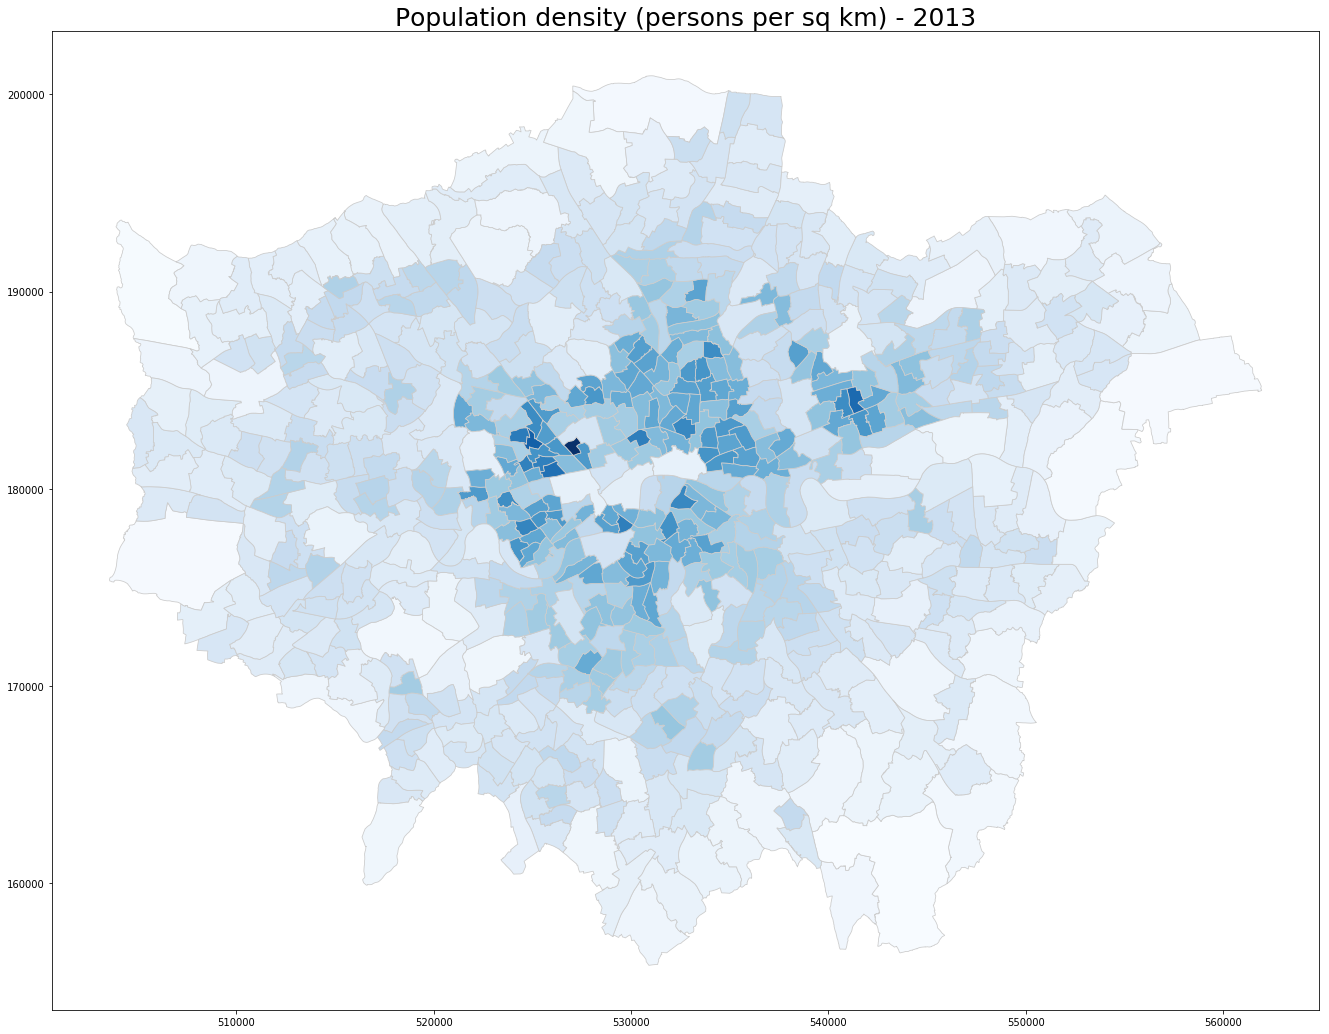

In [132]:
import matplotlib.pyplot as plt

variable = 'POPULATION_DENSITY'
title='Population density (persons per sq km) - 2013'
source='Source: https://data.london.gov.uk/dataset/ward-profiles-and-atlas'

# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 18))

# add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
# ax.annotate(source,xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [ ]:
fig.savefig(“map_export.png”, dpi=300)

,0
0,K04000001 England and Wales
1,E12000007 London
2,E13000001 Inner London
3,E09000007 Camden
4,E36007157 Belsize


In [162]:
df=pd.read_excel('CT0226 - Country of birth (detailed).xls', sheet_name='df', header=None)

confusing_wards=[]
for i in df[0]:
    i=i.lstrip()
    if(i.startswith('E09')):
        borough_code=i.split(' ')[0]
        borough_name=i.split(' ')[1]
    if(i.startswith('E36')):
        ward_code=i.split(' ')[0]
        ward_name=i.split(' ')[1]
        confusing_wards.append([borough_code, borough_name, ward_code, ward_name])

In [168]:
df_confusing_wards=pd.DataFrame(confusing_wards)
df_confusing_wards.columns=['borough_code', 'borough_name', 'ward_code', 'ward_name']
df_confusing_wards.head()
# df_confusing_wards.to_csv('df_confusing_wards.csv')

,borough_code,borough_name,ward_code,ward_name
0,E09000007,Camden,E36007157,Belsize
1,E09000007,Camden,E36007158,Bloomsbury
2,E09000007,Camden,E36007159,Camden
3,E09000007,Camden,E36007160,Cantelowes
4,E09000007,Camden,E36007161,Fortune


In [169]:
df_age=pd.read_excel('Age_percentage.xlsx', sheet_name='df')
df_age.head()
df_age=pd.merge(df_confusing_wards, df_age, how='left', left_on='ward_code', right_on='Code')
df_age

,borough_code,borough_name,ward_code,ward_name,Code,Name,age_Light_Risk,age_Medium_Risk,age_High_Risk,0_15,16_24,25_49,50_64,65_74,75_over
0,E09000007,Camden,E36007157,Belsize,E36007157,Belsize,0.749016,0.131003,0.119981,0.174461,0.071957,0.502598,0.131003,0.065423,0.054558
1,E09000007,Camden,E36007158,Bloomsbury,E36007158,Bloomsbury,0.791039,0.108795,0.100165,0.071337,0.334282,0.385420,0.108795,0.056739,0.043426
2,E09000007,Camden,E36007159,Camden,E36007159,Camden Town with Primrose Hill,0.737414,0.149132,0.113454,0.153730,0.120511,0.463173,0.149132,0.071276,0.042179
3,E09000007,Camden,E36007160,Cantelowes,E36007160,Cantelowes,0.775010,0.134172,0.090818,0.161845,0.176268,0.436897,0.134172,0.052746,0.038071
4,E09000007,Camden,E36007161,Fortune,E36007161,Fortune Green,0.768058,0.135434,0.096508,0.150426,0.106985,0.510647,0.135434,0.056218,0.040290
5,E09000007,Camden,E36007162,Frognal,E36007162,Frognal and Fitzjohns,0.727682,0.132154,0.140164,0.179126,0.112047,0.436509,0.132154,0.071083,0.069081
6,E09000007,Camden,E36007163,Gospel,E36007163,Gospel Oak,0.721946,0.155984,0.122070,0.196023,0.109641,0.416282,0.155984,0.065430,0.056641
7,E09000007,Camden,E36007164,Hampstead,E36007164,Hampstead Town,0.683052,0.158208,0.158740,0.174978,0.059982,0.448092,0.158208,0.081100,0.077640
8,E09000007,Camden,E36007165,Haverstock,E36007165,Haverstock,0.763345,0.125526,0.111129,0.194921,0.133614,0.434811,0.125526,0.055807,0.055322
9,E09000007,Camden,E36007166,Highgate,E36007166,Highgate,0.660338,0.187494,0.152168,0.178183,0.089000,0.393154,0.187494,0.086718,0.065450
